# **BioSignal Analysis for Smoking**

**Importing Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [5]:
data = pd.read_csv('smoking.csv')
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
data.shape

(55692, 27)

In [7]:
#Dropping Irrelevant Columns -> ID and Oral

data = data.drop(columns=['ID','oral'])
data.head()


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [8]:
data.info()

#NO null values
#Total Records = 55692

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [9]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
data.corr(numeric_only=True)

#No as such correlation 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,0.050745,...,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.162557
height(cm),-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,0.113193,...,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.396675
weight(kg),-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,0.271634,...,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.302780
waist(cm),-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,0.292627,...,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.226259
eyesight(left),-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,0.005199,...,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.061204
eyesight(right),-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,0.011357,...,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.063017
hearing(left),0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,0.008754,...,-0.020159,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.023209
hearing(right),0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,0.001651,...,-0.017986,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.018855
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,0.761051,...,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.073109
relaxation,0.050745,0.113193,0.271634,0.292627,0.005199,0.011357,0.008754,0.001651,0.761051,1.000000,...,-0.089410,0.041017,0.232899,0.045665,0.085033,0.085151,0.106648,0.177648,0.031634,0.108309


**Getting Number of people smoking ciggarettes**

In [12]:
data.smoking.value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

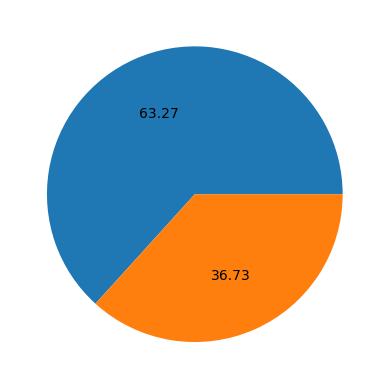

In [13]:

plt.pie(data.smoking.value_counts(),autopct='%0.2f')
plt.show()

#20k people smokes ciggarettes which is 36%.

**Comparing male and female**

In [15]:
data[['gender','smoking']].value_counts()

gender  smoking
M       1          19596
F       0          19432
M       0          15805
F       1            859
Name: count, dtype: int64

In [16]:
pd.crosstab(data['gender'],data['smoking'])

smoking,0,1
gender,,
F,19432,859
M,15805,19596


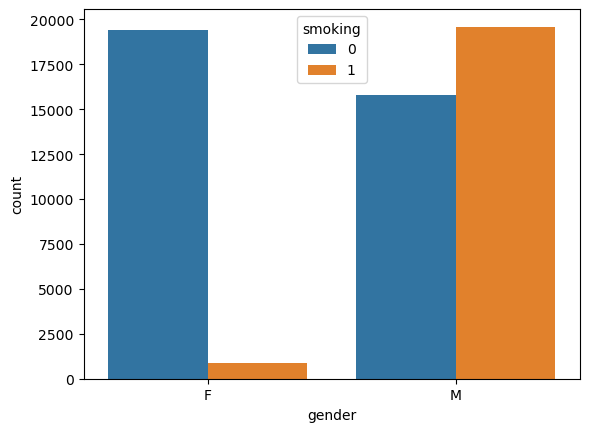

In [17]:

sns.countplot(x=data.gender, hue = data.smoking)
plt.show()

##Most Smokers are Men

**Age wise distribution**

In [19]:
data.groupby('age').smoking.value_counts()

age  smoking
20   1           818
     0           787
25   0          1891
     1          1634
30   0          2120
     1          1936
35   1          2388
     0          2092
40   0          9588
     1          5593
45   0          4670
     1          2367
50   0          3636
     1          1913
55   0          3543
     1          1477
60   0          4440
     1          1727
65   0          1033
     1           303
70   0           665
     1           162
75   0           508
     1           106
80   0           250
     1            30
85   0            14
     1             1
Name: count, dtype: int64

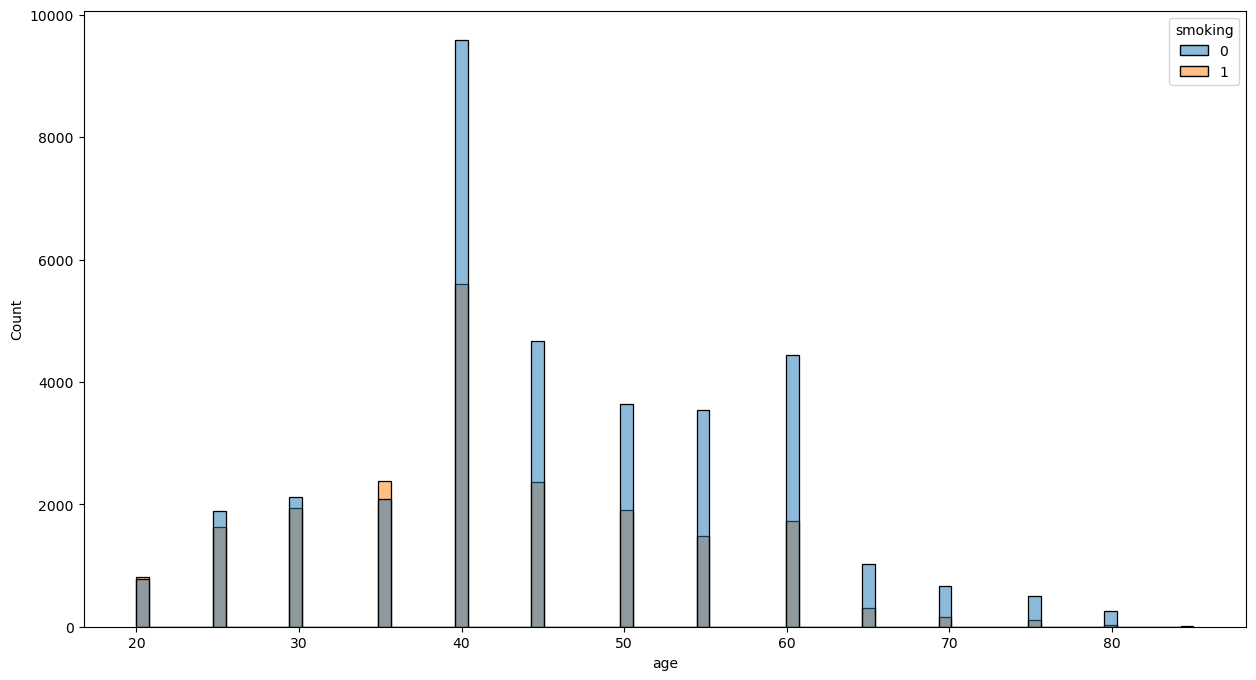

In [75]:

plt.figure(figsize=(15,8))
sns.histplot(x=data.age,hue = data.smoking)
plt.show()

#Highest number of samples from age group 40 and highest number of smokers from same age group.

**Encoding categorial value**

In [22]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['tartar'] = le.fit_transform(data['tartar'])
data['dental caries'] = le.fit_transform(data['dental caries'])


In [23]:
data.head(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


**Feature Selection using ExtraTreeClassifier** 

In [25]:
X = data.drop('smoking', axis=1) #Features 
y = data['smoking'] #target

In [26]:
#for feature selection using ExtraTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
model.fit(X,y)

features_I=pd.Series(model.feature_importances_,index=X.columns)

features_I=features_I.nlargest(24)
features_I

gender                 0.193831
hemoglobin             0.057197
triglyceride           0.055324
Gtp                    0.054610
height(cm)             0.054263
age                    0.044135
weight(kg)             0.043299
waist(cm)              0.042747
HDL                    0.040013
fasting blood sugar    0.039551
ALT                    0.039323
relaxation             0.039186
serum creatinine       0.039169
systolic               0.039003
LDL                    0.038780
Cholesterol            0.038544
AST                    0.038446
eyesight(left)         0.034968
eyesight(right)        0.034947
Urine protein          0.009373
tartar                 0.009358
dental caries          0.008524
hearing(right)         0.002891
hearing(left)          0.002518
dtype: float64

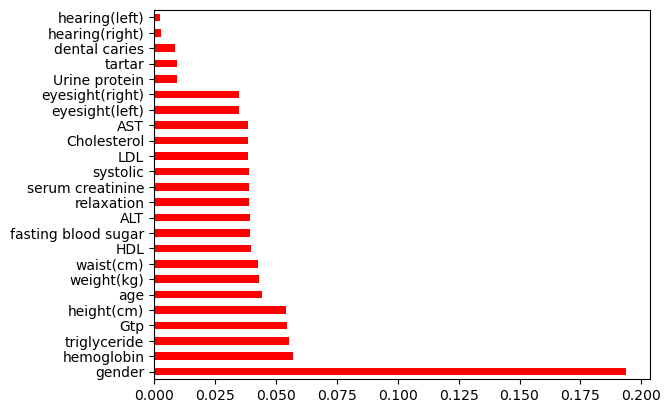

In [27]:
#Visualizing Important Features 

features_I.plot(kind='barh',color = 'red')
plt.show()


In [28]:
data.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [29]:
#Important Features

X=data[['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp','tartar']]

y=data['smoking'] 


In [30]:
#splitting Data into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state =4)


**Logistic Regression Model**

In [31]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


C:\Users\Onkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:

from sklearn.metrics import accuracy_score,classification_report

print(f"Accuracy With Logistic Regression :{accuracy_score(y_test,y_pred)*100:.2f}")
print(classification_report(y_test,y_pred
                           

Accuracy With Logistic Regression :71.72
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      7017
           1       0.64      0.53      0.58      4122

    accuracy                           0.72     11139
   macro avg       0.70      0.68      0.68     11139
weighted avg       0.71      0.72      0.71     11139



**Decision Tree**

In [33]:

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)


In [34]:

print(classification_report(y_test,y_pred))
print(f"Accuracy With DecisionTree :{accuracy_score(y_test,y_pred)*100:.2f}")


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7017
           1       0.71      0.71      0.71      4122

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139

Accuracy With DecisionTree :78.88


**Bagging Algorithm -> RandomForest Classifier**

In [35]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)


In [36]:

print(classification_report(y_test,y_pred))
print(f"Accuracy With RandomForest : {accuracy_score(y_test,y_pred)*100:.2f}")


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7017
           1       0.77      0.81      0.79      4122

    accuracy                           0.84     11139
   macro avg       0.83      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139

Accuracy With RandomForest : 83.88
